# LLM Fallback Detection & QA Loop
This notebook simulates how fallback responses from an LLM (like GPT) can be detected, logged, and analyzed for retraining.


❌ Fallback Responses Detected:
                                       question               response
0       What experience do you have with React?            It depends.
1  Tell us about a time you solved a tough bug.          I'm not sure.
2               Can you explain fallback logic?  Fallback logic helps.
3               How would you optimize prompts?          I'm not sure.

📊 Fallback Frequency by Question:
What experience do you have with React?: 1 times
Tell us about a time you solved a tough bug.: 1 times
Can you explain fallback logic?: 1 times
How would you optimize prompts?: 1 times


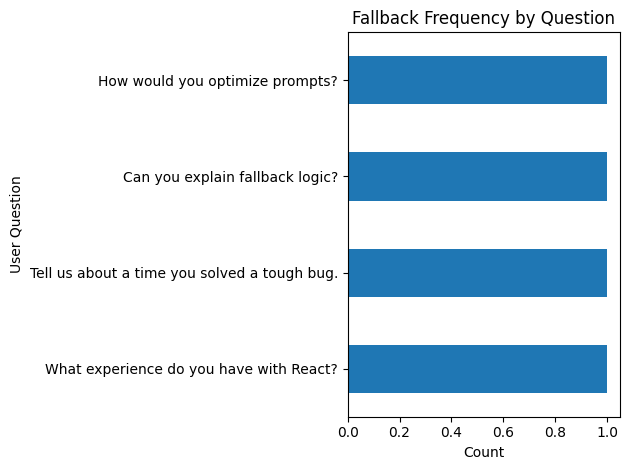

In [1]:
import re
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# STEP 1: Simulated chatbot Q&A (like from FlashDeck)
llm_outputs = [
    {"question": "What experience do you have with React?", "response": "It depends."},
    {"question": "Tell us about a time you solved a tough bug.", "response": "I'm not sure."},
    {"question": "What do you know about RAG?", "response": "Retrieval-Augmented Generation is a technique."},
    {"question": "Can you explain fallback logic?", "response": "Fallback logic helps."},
    {"question": "How would you optimize prompts?", "response": "I'm not sure."}
]

# STEP 2: Define fallback patterns that suggest vague or unhelpful responses
fallback_patterns = [
    r"\bI'?m not sure\b",
    r"\bIt depends\b",
    r"\bSorry\b",
    r"\bI don'?t (have|know)\b",
    r"\b(helps|works)\b\.$"
]

# STEP 3: Function to detect fallback responses
def detect_fallback(response):
    for pattern in fallback_patterns:
        if re.search(pattern, response, re.IGNORECASE):
            return True
    return False

# STEP 4: Identify and log fallback responses
fallback_log = []
for entry in llm_outputs:
    if detect_fallback(entry["response"]):
        fallback_log.append({
            "question": entry["question"],
            "response": entry["response"],
            "tag": "fallback"
        })

# STEP 5: Convert fallback responses into DataFrame
df = pd.DataFrame(fallback_log)

# STEP 6: Display results and visualize fallback patterns
if not df.empty:
    print("\n❌ Fallback Responses Detected:")
    print(df[["question", "response"]])

    print("\n📊 Fallback Frequency by Question:")
    freq = Counter(df["question"])
    for q, count in freq.items():
        print(f"{q}: {count} times")

    df["question"].value_counts().plot(kind="barh", title="Fallback Frequency by Question")
    plt.xlabel("Count")
    plt.ylabel("User Question")
    plt.tight_layout()
    plt.show()

else:
    print("✅ No fallback responses detected.")
